<h2 align='center'> Exercise 2(optional)</h2>

### Custom implementation of Levenshtein Distance

In [15]:
import numpy as np

def levenshteinDistanceDP(token1, token2):
    # Initialize a matrix to store distances between prefixes of token1 and token2
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    # Initialize the first column with the number of characters in token1
    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    # Initialize the first row with the number of characters in token2
    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    # Variables to store distances in three directions (left, up, diagonal)
    a = 0
    b = 0
    c = 0
    
    # Fill in the matrix with Levenshtein distances
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            # If characters at the current positions match
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                # Update variables with distances in three directions
                a = distances[t1][t2 - 1]  # left
                b = distances[t1 - 1][t2]  # up
                c = distances[t1 - 1][t2 - 1]  # diagonal
                
                # Choose the minimum distance and update the current position
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    # Print the distance matrix
    printDistances(distances, len(token1), len(token2))
    
    # Return the final Levenshtein distance between token1 and token2
    return distances[len(token1)][len(token2)]

# Helper function to print the distance matrix
def printDistances(distances, token1Length, token2Length):
    for t1 in range(token1Length + 1):
        for t2 in range(token2Length + 1):
            print(int(distances[t1][t2]), end=" ")
        print()

# Example usage with two strings "kelm" and "hello"
levenshteinDistanceDP("kelm", "hello")

0 1 2 3 4 5 
1 1 2 3 4 5 
2 2 1 2 3 4 
3 3 2 1 2 3 
4 4 3 2 2 3 


3.0

In [16]:
### Download a Vocabulary (reuters)

In [17]:
import nltk
"""nltk.download('reuters')
nltk.download('punkt')
"""

# /root/nltk_data/corpora/reuters.zip
from nltk.corpus import reuters


corpus = reuters.words()

In [18]:
corpus

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

In [31]:
from pprint import pprint

N = 10
# Frequency distribution
freq_dist_corpus = nltk.FreqDist(corpus)
print('{} most common tokens: \n')

cleaned_corpus_sentences = []
for sent in reuters.sents():
    cleaned_corpus_sent = [word if freq_dist_corpus[word] > 10 else 'UKN' for word in sent]
    cleaned_corpus_sentences.append(cleaned_corpus_sent)
    
print(cleaned_corpus_sentences[:10])



{} most common tokens: 

[['ASIAN', 'EXPORTERS', 'UKN', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'UKN', 'UKN', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'UKN', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'UKN', 'in', 'Asian', 'UKN', 'a', 'U', '.', 'S', '.', 'UKN', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ['But', 'some', 'exporters', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long', '-', 'run', ',', 'in', 'the', 'short', '-', 'term', 'Tokyo', "'", 's', 'loss', 'might', 'be', 'their', 'gain', '.'], ['The', 'U', '.', 'S', '.', 'Has', 'said', 'it', 'will', 'imp

### Make cleaned_corpus_sentences a list of words again

In [32]:
corpus = [word for sublist in cleaned_corpus_sentences for word in sublist]
print(corpus[:50])

['ASIAN', 'EXPORTERS', 'UKN', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'UKN', 'UKN', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'UKN', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.', 'They']


#### Re-initialize the levenshteinDistanceDP func(), to avoid printing every single distances-matrix.

In [33]:
import numpy as np
def levenshteinDistanceDP(token1, token2):
    distances = np.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    
    return distances[len(token1)][len(token2)]


In [34]:
#### For each word in the corpus accept only those having distances <= 4

In [37]:
# Our word is developement
w = "development"
# Our maximum distance threshold will be
d = 7

accepted_words = []
for word in corpus:
    distance = levenshteinDistanceDP(word, w)
    
    if distance <= d:
        accepted_words.append(word)

        
print(accepted_words[:50])

['sentiment', 'helped', 'open', 'prevent', 'government', 'seven', 'seven', 'government', 'demand', 'demand', 'decline', 'demand', 'demand', 'Department', 'department', 'declined', 'seven', 'demand', 'delivery', 'recent', 'movement', 'movements', 'movements', 'telephone', 'open', 'delivery', 'development', 'delegation', 'Department', 'Department', 'shipment', 'delivery', 'statement', 'open', 'treatment', 'President', 'everything', 'investment', 'investment', 'government', 'dealing', 'reluctant', 'expect', 'demand', 'recent', 'Agreement', 'statement', 'agreement', 'seventh', 'reflect']


### Make a word-cloud visualization

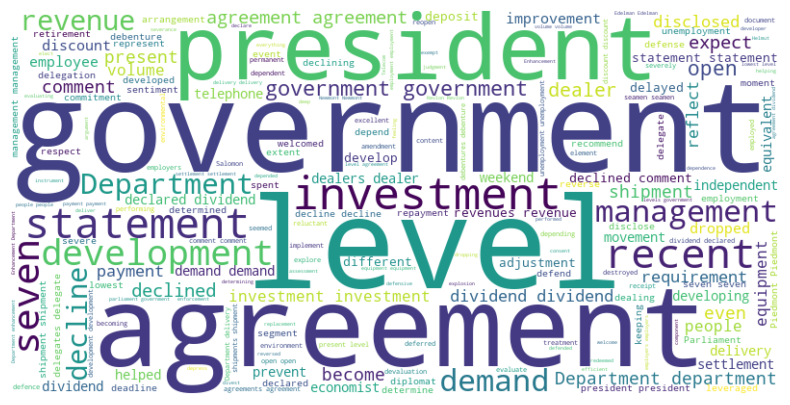

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


accepted_words_text = ' '.join(accepted_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(accepted_words_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()